# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
import torch

print(torch.__version__)
device = "mps" if torch.mps.is_available else "cpu"

2.7.0


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-driving cars, such as Tesla using computer vision to percieve what's happening on the road. See Tesla AI day for more - https://youtu.be/j0z4FweCy4M
2. Healthcare imaging, such as using computer vision to help interpret X-rays. Google also uses computer vision for detecting polyps in the intenstines - https://ai.googleblog.com/2021/08/improved-detection-of-elusive-polyps.html
3. Security, computer vision can be used to detect whether someone is invading your home or not - https://store.google.com/au/product/nest_cam_battery?hl=en-GB

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

オーバーフィットとは、機械学習モデルがトレーニングデータに対して正確な予測をするが、新しいデータについては正確に予測しないという、望ましくない機械学習の動作です。データサイエンティストが機械学習モデルを使用して予測を行う場合、まず既知のデータセットでモデルをトレーニングします。次に、この情報に基づいて、モデルは新しいデータセットの結果を予測しようとします。オーバーフィットしたモデルは、予測が不正確になる可能性があり、すべてのタイプの新しいデータに対してうまく機能しません。

https://aws.amazon.com/what-is/overfitting/

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

**早期停止**

早期停止では、機械学習モデルがデータ内のノイズを学習する前に、トレーニングフェーズを一時停止します。ただし、適切なタイミングで行うことが重要です。タイミングが適切ではない場合、モデルは正確な結果を提供できません。

**プルーニング**

モデルを構築するときに、最終的な予測に影響を及ぼすいくつかの特徴量やパラメータを特定できます。特徴量の選択 (またはプルーニング) は、トレーニングセット内で最も重要な特徴量を特定し、無関係な特徴量を排除します。例えば、画像に含まれているのが動物と人間のどちらであるかを予測する場合には、輪郭、耳の位置、身体構造など、さまざまな入力パラメータが考えられます。輪郭を優先し、目の形を無視することもできます。

**正則化**

正則化は、オーバーフィットを減らすことを目指すトレーニング/最適化手法をまとめたものです。これらの手法は、重要度に基づいて特徴量を等級付けすることにより、予測結果に影響を与えない要因の排除を試みます。例えば、数学的計算では、影響が微小な特徴量にペナルティ値が適用されます。20 年後の都市における住宅価格の予測を試みる統計モデルを考えてみましょう。正則化は、人口増加や平均年収などの特徴量には低いペナルティ値を与えますが、都市の年間平均気温に対しては高いペナルティ値を与えます。

**アンサンブル**

アンサンブルとは、いくつかの個別の機械学習アルゴリズムからの予測を組み合わせることです。結果が不正確であることが多いため、一部のモデルは弱学習器と呼ばれます。アンサンブル手法では、より正確な結果を得るために、すべての弱学習器を組み合わせます。複数のモデルを使用してサンプルデータを分析し、最も正確な結果を選択します。アンサンブルの主要な 2 つの手法は、バギングとブースティングです。ブースティングは、最終結果を取得するためにさまざまな機械学習モデルを次々にトレーニングし、バギングはそれらを並行してトレーニングします。

**データ拡張**

データ拡張は、モデルが処理するたびにサンプルデータをわずかに変更する機械学習の手法です。これは、入力データを少し変更することで実現できます。データ拡張を適度に実行すると、トレーニングセットがモデルに固有なものとなり、モデルがその特性を学習できなくなります。例えば、入力画像に対して、平行移動、反転、回転などの変換を適用します。

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [11]:
from torchvision import datasets
from torchvision import transforms

train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor()
                            )
test_data = datasets.MNIST(root="data",
                            train=False,
                            download=True,
                            transform=transforms.ToTensor()
                            )
                        

In [151]:
print(type(train_data))
print(len(train_data))
print(len(test_data))
# print(train_data[0][0].shape)
# print(train_data[1])
print(train_data.targets[:10])

<class 'torchvision.datasets.mnist.MNIST'>
60000
10000
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


In [36]:
# Check out the shapes of our data
img, label = train_data[0][0], train_data[0][1]
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

# Get the class names from the dataset
class_names = train_data.classes
print(class_names[1])
print(type(class_names))

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer
1 - one
<class 'list'>


## 6. Visualize at least 5 different samples of the MNIST training dataset.

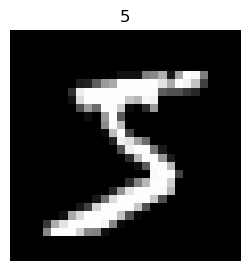

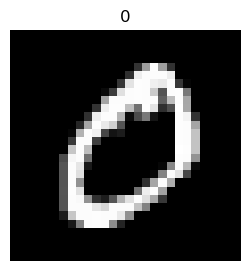

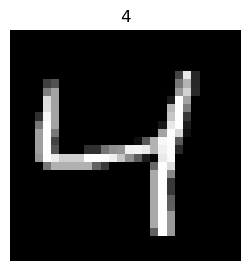

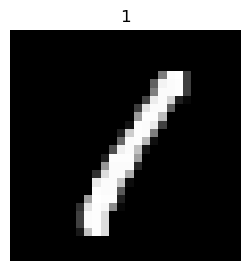

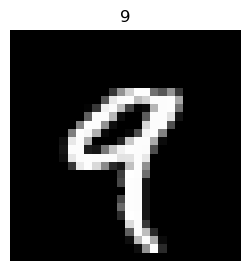

In [37]:
import matplotlib.pyplot as plt

for i in range(5):
    img = train_data[i][0]
    img_squeeze = img.squeeze()
    label = train_data[i][1]
    plt.figure(figsize=(3, 3))
    plt.imshow(X=img_squeeze, cmap="gray")
    plt.title(label=label)
    plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [161]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [163]:
from torch import nn
class MNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int, device: torch.device):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1, device=device),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1, device=device),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1, device=device),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1, device=device),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape,
                      device=device)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        return self.linear(x)

In [164]:
model_2 = MNISTModel(input_shape=1,
                     hidden_units=10,
                     output_shape=len(class_names),
                     device=device)
dummy_x = torch.randn(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
model_2(dummy_x)

tensor([[ 0.0064, -0.0528, -0.0126, -0.0215, -0.0494, -0.0690, -0.0004, -0.0298,
         -0.0537,  0.0228]], device='mps:0', grad_fn=<LinearBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [165]:
%%time
from tqdm import tqdm
torch.manual_seed(42)

epochs = 5

model_cpu = MNISTModel(input_shape=1,
                     hidden_units=10,
                     output_shape=len(class_names),
                     device="cpu")

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(),lr=0.1)

model_cpu.train()
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to("cpu"), y.to("cpu")
        y_preds = model_cpu(X)
        loss = loss_fn(y_preds, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_loss /= len(train_dataloader)
    test_loss = 0
    model_cpu.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to("cpu"), y.to("cpu")
            y_test = model_cpu(X)
            loss = loss_fn(y_test, y)
            test_loss += loss
        test_loss /= len(test_dataloader)
    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")

 20%|██        | 1/5 [00:28<01:52, 28.14s/it]

Epoch: 0 | Loss: 0.265 | Test loss: 0.076


 40%|████      | 2/5 [00:55<01:23, 27.97s/it]

Epoch: 1 | Loss: 0.067 | Test loss: 0.041


 60%|██████    | 3/5 [01:24<00:56, 28.10s/it]

Epoch: 2 | Loss: 0.053 | Test loss: 0.044


 80%|████████  | 4/5 [01:52<00:28, 28.07s/it]

Epoch: 3 | Loss: 0.044 | Test loss: 0.044


100%|██████████| 5/5 [02:20<00:00, 28.07s/it]

Epoch: 4 | Loss: 0.038 | Test loss: 0.031
CPU times: user 2min 43s, sys: 2min 42s, total: 5min 25s
Wall time: 2min 20s


In [166]:

from tqdm import tqdm

epochs = 5

model_mps = MNISTModel(input_shape=1,
                     hidden_units=10,
                     output_shape=len(class_names),
                     device=device)
print(next(model_mps.parameters()).device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_mps.parameters(),lr=0.1)

model_mps.train()
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        y_preds = model_mps(X)
        loss = loss_fn(y_preds, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_loss /= len(train_dataloader)
    test_loss = 0
    model_mps.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)
            y_test = model_mps(X)
            loss = loss_fn(y_test, y)
            test_loss += loss
        test_loss /= len(test_dataloader)
    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")

mps:0


 20%|██        | 1/5 [00:05<00:22,  5.70s/it]

Epoch: 0 | Loss: 0.276 | Test loss: 0.080


 40%|████      | 2/5 [00:11<00:16,  5.66s/it]

Epoch: 1 | Loss: 0.068 | Test loss: 0.065


 60%|██████    | 3/5 [00:16<00:11,  5.66s/it]

Epoch: 2 | Loss: 0.053 | Test loss: 0.051


 80%|████████  | 4/5 [00:22<00:05,  5.68s/it]

Epoch: 3 | Loss: 0.044 | Test loss: 0.041


100%|██████████| 5/5 [00:28<00:00,  5.67s/it]

Epoch: 4 | Loss: 0.039 | Test loss: 0.045


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [167]:

img, label = test_data[0][0], test_data[0][1]
img.shape

torch.Size([1, 28, 28])

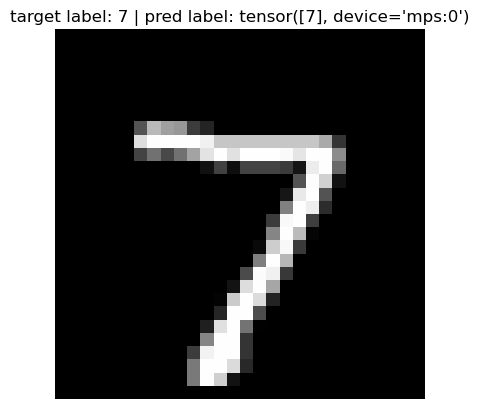

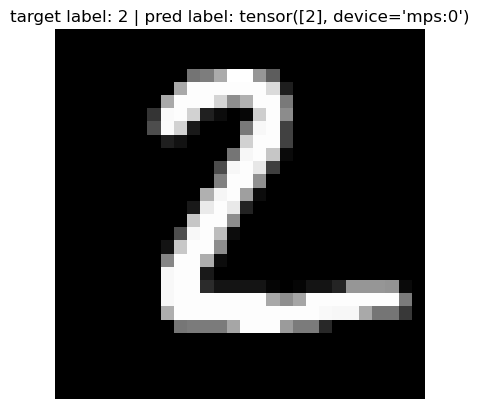

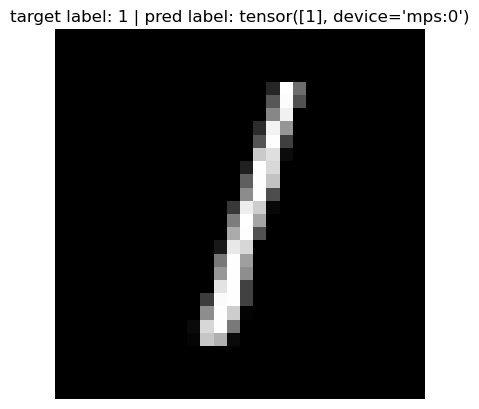

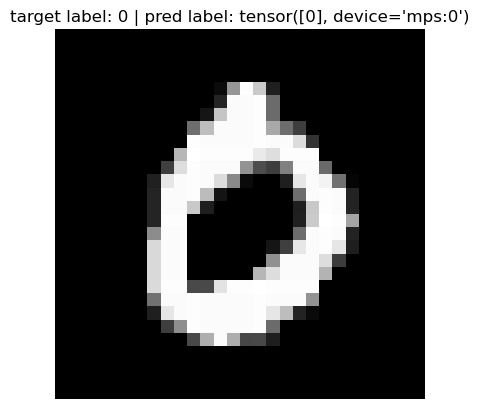

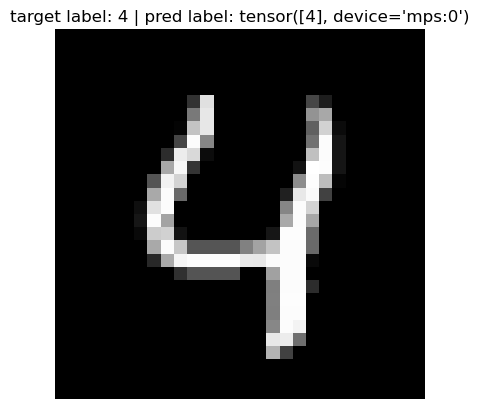

In [168]:
num_to_plot = 5
for i in range(num_to_plot):
    img, label = test_data[i][0], test_data[i][1]
    y_pred = model_mps(img.unsqueeze(dim=0).to(device)).softmax(dim=1)
    y_label = torch.argmax(y_pred, dim=1)
    plt.figure()
    plt.imshow(X=img.squeeze(), cmap="gray")
    plt.title(f"target label: {label} | pred label: {y_label}")
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [169]:
model_mps.eval()
y_preds = []
with torch.inference_mode():

    for batch, (X, y) in tqdm(enumerate(test_dataloader)):
        X, y = X.to(device), y.to(device)
        y_logit = model_mps(X)
        y_pred = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
        y_preds.append(y_pred)
    print(y_preds[0].shape)
    y_preds = torch.cat(y_preds).cpu()

print(y_preds.shape)

313it [00:00, 635.44it/s]

torch.Size([32])
torch.Size([10000])


In [171]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

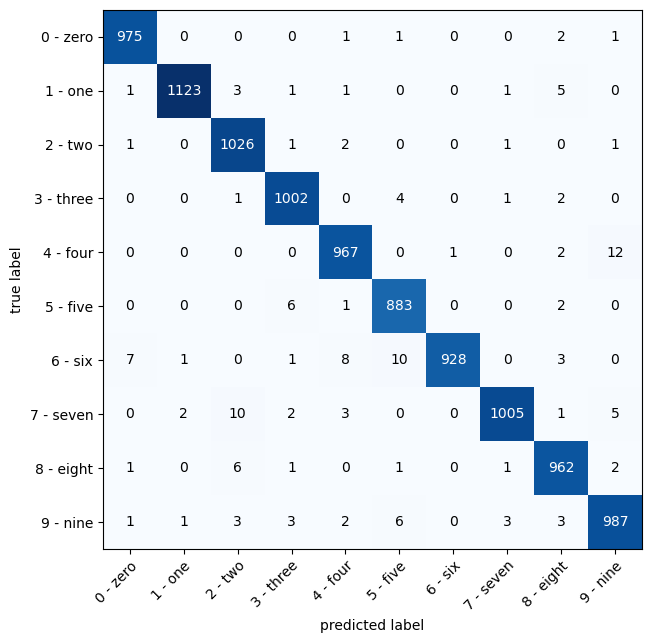

In [172]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(y_preds, test_data.targets)

fix, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                figsize=(10, 7),
                                class_names=class_names)

In [ ]:
# a = torch.tensor([1, 2, 3, 4])
# b = torch.tensor([5, 6, 7, 8])
# c = torch.tensor([9, 10, 11, 12])

# y_preds = [a, b, c]
# result = torch.cat(y_preds,dim=0)

# print(result)

In [ ]:
# a = torch.randn(2, 3)  # shape [2, 3]
# b = torch.randn(2, 3)
# print(a)
# y_preds = [a, b]
# result = torch.cat(y_preds, dim=0)  # default dim=0，shape -> [4, 3]
# print(result)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [182]:
sample_tensor = torch.randn(size=(1, 3 ,64, 64))
conv2d = nn.Conv2d(in_channels=3,
                     out_channels=64,
                     kernel_size=2,
                     stride=3,
                     padding=0)
conv2d_output = conv2d(sample_tensor)
print(conv2d_output.shape)

torch.Size([1, 64, 21, 21])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?